<font>
    <h1 style="text-align: center">
        AmirReza Azari <br>
        99101087
    </h1>
</font>

In this notebook, we are looking for the diagnosis of heart disease among patients using the [heart disease dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset). First, read the information about the different features, then answer the questions in each section using the attached data.

# Data

## Importing Libraries

In this notebook, you cannot use scikit learn and other libraries, except for those imported below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Load dataset csv file into a data frame.

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In this section, you should analyze the data. You can use the functions provided by the Pandas library. You can use analysis such as null checking of features, number of features and samples, and type of features. But don't stop there and search for it.


In [4]:
features = df.shape[1]
samples = df.shape[0]
print("Number of features are: ", df.shape[1])
print("Number of samples  are: ", df.shape[0])

Number of features are:  14
Number of samples  are:  1025


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [7]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
df.age.value_counts()

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64

In [9]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [10]:
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [11]:
df.ca.value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [12]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [13]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

age


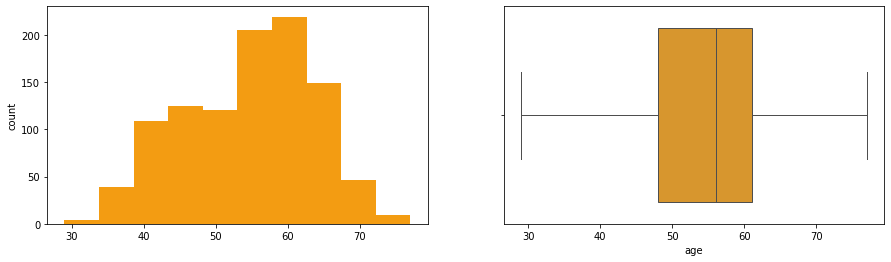

sex


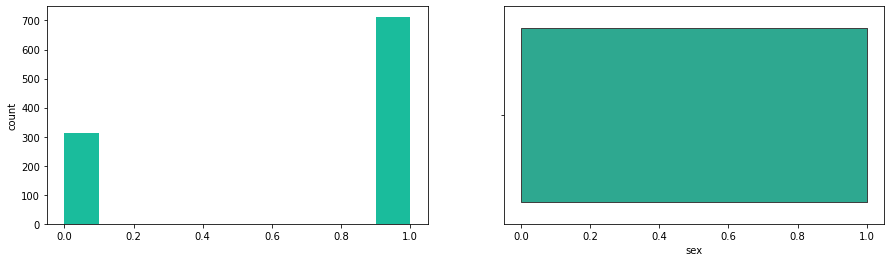

cp


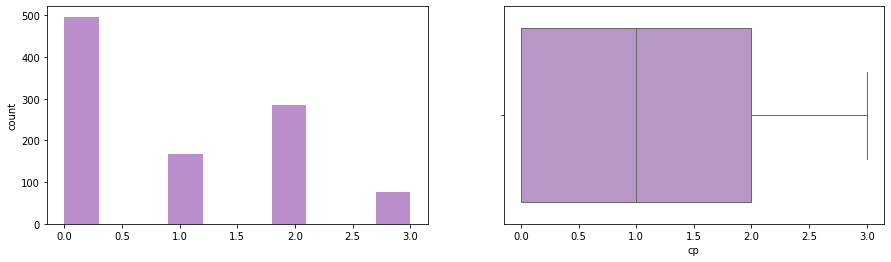

trestbps


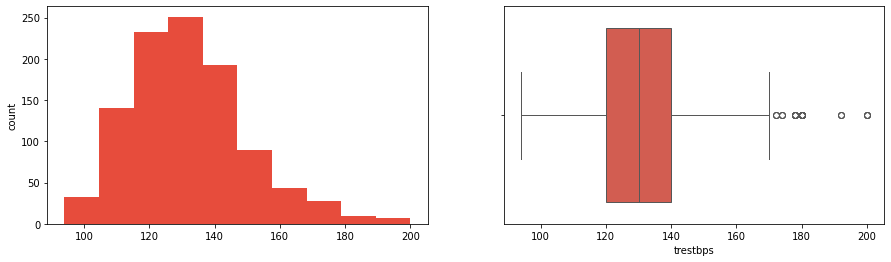

chol


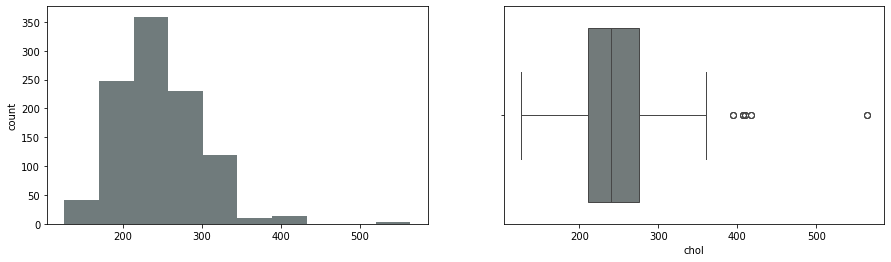

fbs


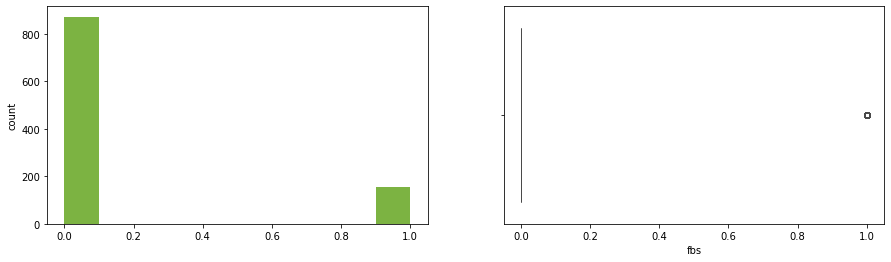

restecg


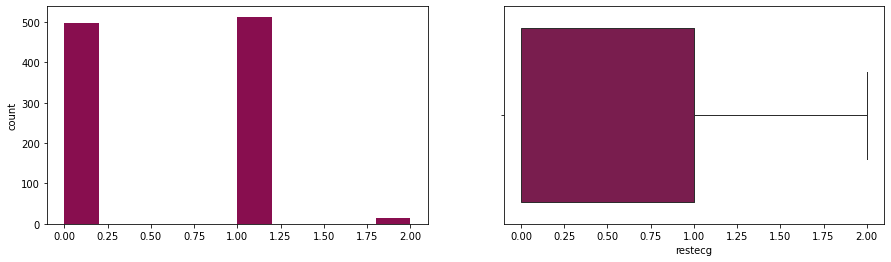

thalach


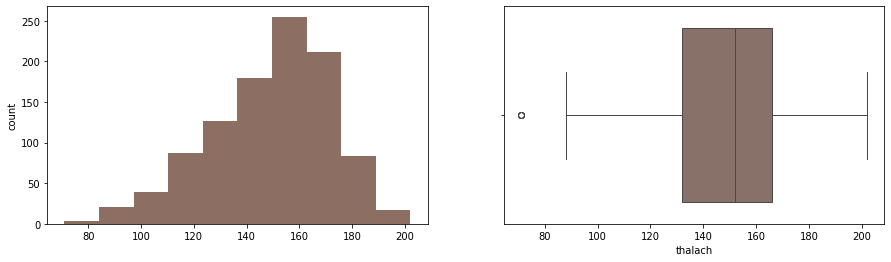

exang


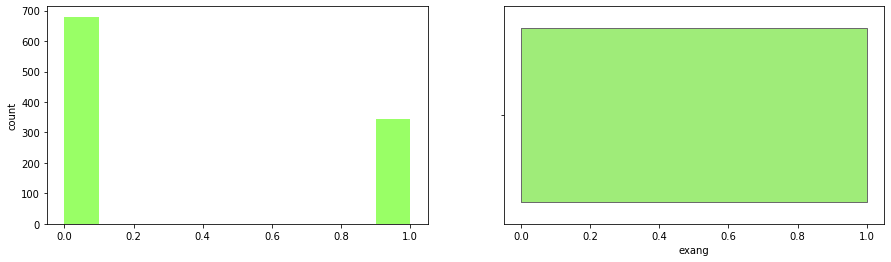

oldpeak


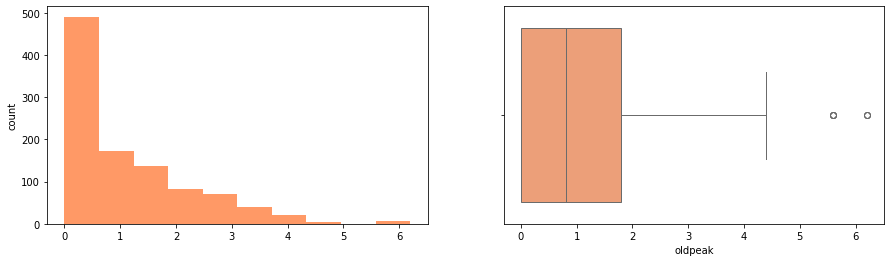

slope


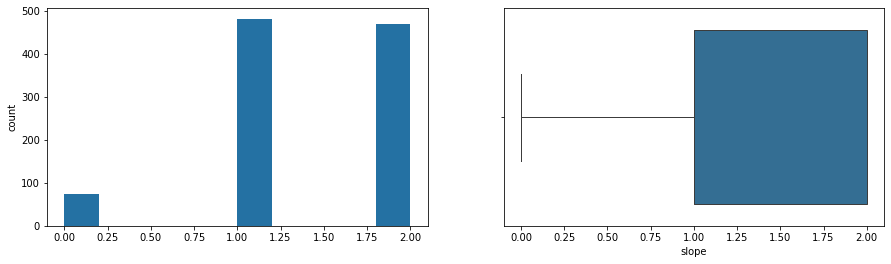

ca


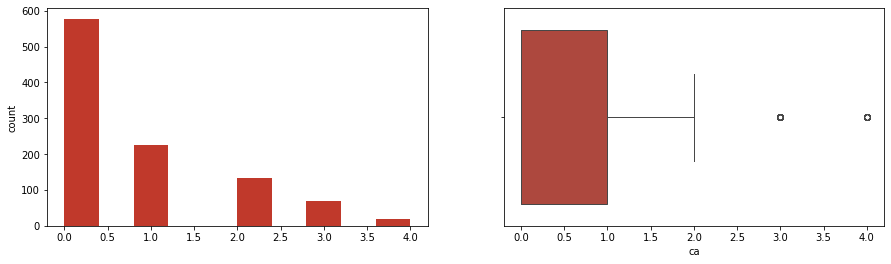

thal


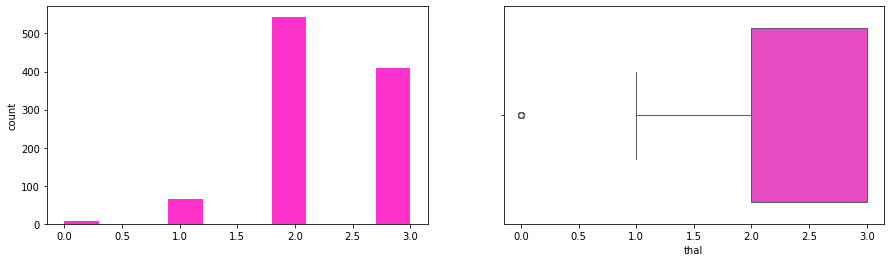

target


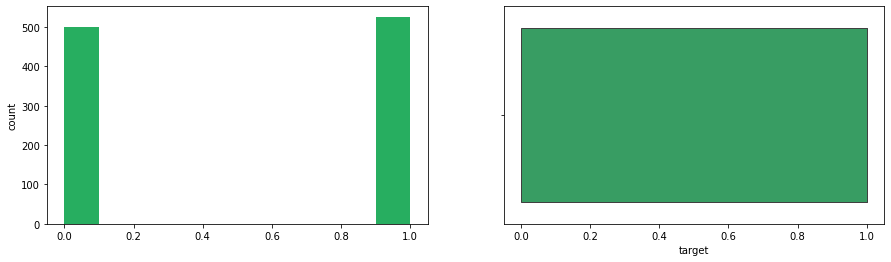

In [15]:
cols = df.select_dtypes(include=np.number).columns.tolist()
colors = ["#F39C12", "#1ABC9C", "#BB8FCE", "#E74C3C", "#707B7C", "#7CB342", "#880E4F", "#8D6E63", "#99FF66", "#FF9966", "#2471A3", "#C0392B", "#FF33CC", "#27AE60"]
color_index = 0
for col in cols:
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False, color=colors[color_index])
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color=colors[color_index])
    color_index += 1
    plt.show()

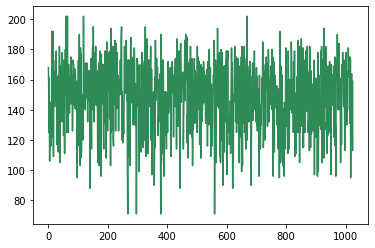

In [16]:
plt.plot(df.thalach, color="SeaGreen")

<Axes: >

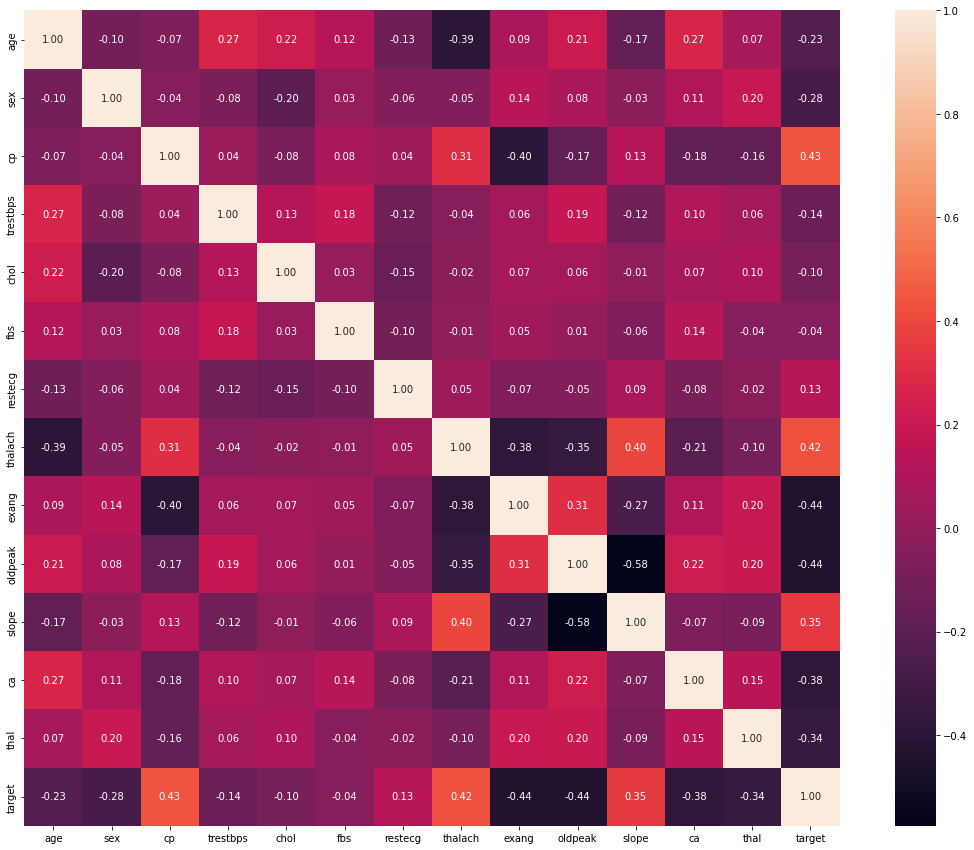

In [17]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, square=True, fmt='0.2f')

## Analysis of Features

As you have probably noticed, in the dataset that you checked, some features are discrete and the rest are continuous. The following code specifies continuous and discrete features for you. **Note**: In the cells below, `df` is the same dataframe that you loaded in the previous section. You can change its name according to your code.

In [18]:
feature_list = [feature for feature in df.columns]
print("There are",len(feature_list),"features found in the data")

There are 14 features found in the data


In [19]:
#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Perceptron

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function.

### Calculating the Error

To calculate the error of a prediction we first need to define the objective function of the perceptron.

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function

As we defined the loss function, we can now define the objective function for the perceptron:

$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$

We can write this without the dot product with a sum sign:

$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$

So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respectively find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function $f$ is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

## Model


Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [20]:
def perceptron_sgd(X, Y):
    '''
    # TODO: implement the below

    Initialize the weight vector for the perceptron with zeros
    Set the learning rate
    Set the number of epochs
    Iterate n times over the whole dataset.
    Iterate over each sample in the dataset
    Misclassification condition y_i * (x_i . w) <= 0
    Update rule for the weights w = w + y_i * x_i including the learning rate

    '''
    w = np.zeros(X.shape[1])
    learning_rate = 0.1
    epochs = 130

    for epoch in range(epochs):
        for idx, x in enumerate(X):
            if (Y[idx] * np.dot(X[idx], w)) <= 0:
                w = w + learning_rate * X[idx] * Y[idx]

    return w

### Let the Perceptron learn!

Next we can execute our code to train a classifier model. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [21]:
def perceptron_sgd_plot(X, Y):
    '''
    TODO: train perceptron and plot the total loss in each epoch. You may not use the above perceptron_sgd(X, Y) function.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''

    w = np.zeros(X.shape[1])
    learning_rate = 0.1
    epochs = 130
    errors = []

    for epoch in range(epochs):
        count = 0
        for idx, x in enumerate(X):
            if (Y[idx] * np.dot(X[idx], w)) <= 0:
                count += (np.dot(X[idx], w) * Y[idx])
                w = w + learning_rate * X[idx] * Y[idx]
        errors.append(count * -1)
    
    plt.figure(figsize = (15, 4))
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

In [22]:
df = pd.read_csv("heart.csv")
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [23]:
for i in range(len(y)):
    if y[i] == 0:
        y[i] = -1
y

array([-1, -1, -1, ..., -1,  1, -1], dtype=int64)

In [24]:
# TODO: Add a bias term -1 into the dataset. This is needed for the SGD to work.
bias_column = np.full((X.shape[0], 1), -1)
X = np.concatenate((X, bias_column), axis=1)
X

array([[  1. ,   0. ,   0. , ..., 168. ,   1. ,  -1. ],
       [  1. ,   0. ,   1. , ..., 155. ,   3.1,  -1. ],
       [  1. ,   0. ,   0. , ..., 125. ,   2.6,  -1. ],
       ...,
       [  1. ,   0. ,   0. , ..., 118. ,   1. ,  -1. ],
       [  0. ,   0. ,   0. , ..., 159. ,   0. ,  -1. ],
       [  1. ,   0. ,   0. , ..., 113. ,   1.4,  -1. ]])

In [25]:
# TODO: Split the data to train and test with a 0.2 ratio
train_count = int(X.shape[0] * 0.8)
X_train, X_val, y_train, y_val = X[:train_count], X[train_count:], y[:train_count], y[train_count:]

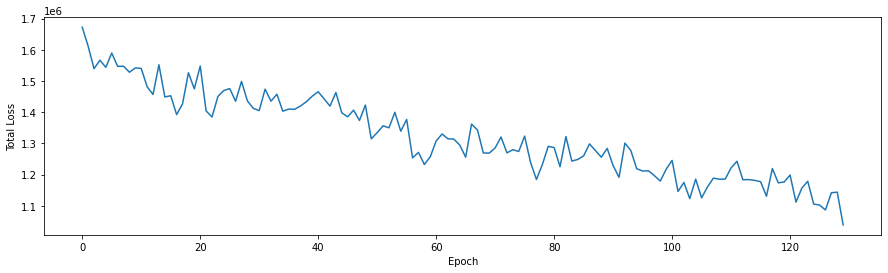

In [26]:
w = perceptron_sgd_plot(X_train,y_train)

### Accuracy


Implement the `accuracy_score` function by considering the predictions and true labels.

In [27]:
def accuracy_score(y_true, y_pred):
    corrects = np.sum(y_true == y_pred)
    return corrects / len(y_true)

Get the accuracy of your model using the function you implemented.

In [28]:
predictions = np.sign(np.dot(X_val, w))
accuracy_score(y_val, predictions) * 100

74.14634146341463

### Confusion Matrix

Implement the `confusion_matrix` function to generate the confusion matrix by receiving the predicted labels, the real labels and the labels themselves.

In [29]:
def confusion_matrix(real, predicted):
    matrix = np.array([[0, 0], [0, 0]])
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    for i in range(len(real)):
        if real[i] == 1 and predicted[i] == 1:
            matrix[1][1] += 1
            count1 += 1
        elif real[i] == -1 and predicted[i] == -1:
            matrix[0][0] += 1
            count4 += 1
        elif real[i] == 1 and predicted[i] == -1:
            matrix[1][0] += 1
            count2 += 1
        elif real[i] == -1 and predicted[i] == 1:
            matrix[0][1] += 1
            count3 += 1

    print("TP: ", count1)
    print("FN: ", count2)
    print("FP: ", count3)
    print("TN: ", count4)
    return matrix

Implement the following function to plot the confusion matrix obtained from the previous part.

In [30]:
def plot_confusion_matrix(matrix, labels):
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted', color="lightBlue")
    plt.ylabel('Real', color="lightBlue")
    plt.title('Confusion Matrix', color="lightBlue")
    plt.show()

Now plot the confusion matrix for your model:

TP:  70
FN:  29
FP:  24
TN:  82


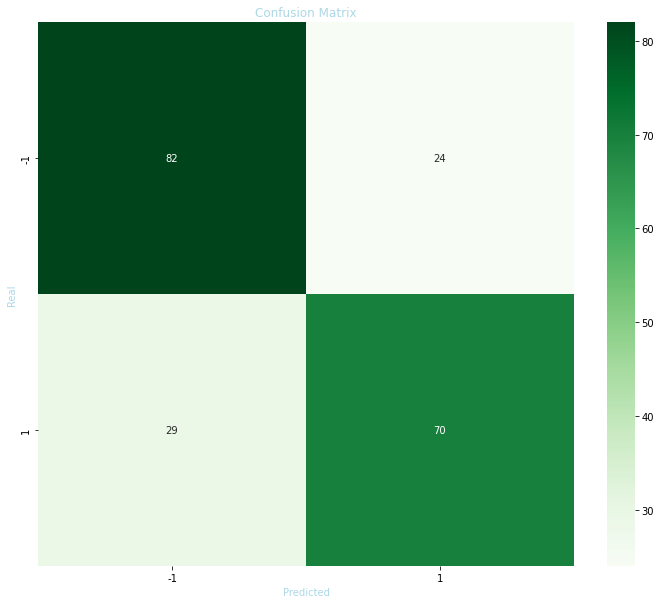

In [31]:
labels = [-1, 1]
cm = confusion_matrix(y_val, predictions)
plot_confusion_matrix(cm, labels)

### F1 Score

Implement the following functions to calculate precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) using confusion matrix. Then calculate all three metrics for your model.

In [32]:
def recall_score(cm):
    return cm[1][1] / (cm[1][1] + cm[1][0])

recall = recall_score(cm)
recall

0.7070707070707071

In [33]:
def precision_score(cm):
    return cm[1][1] / (cm[1][1] + cm[0][1])

precision = precision_score(cm)
precision

0.7446808510638298

In [34]:
def f1_score(cm):
    recall = cm[1][1] / (cm[1][1] + cm[1][0])
    precision = cm[1][1] / (cm[1][1] + cm[0][1])
    return (2 * recall * precision)/(precision + recall)

f1_score(cm)

0.7253886010362693

# Naive Bayes

## Model

To predict the target column we want to use a Naive Bayes classifier. In this section, you must implement the functions of the `MixedDataNB` class. Assume continuous features follow a normal distribution. **Hint**: You need to train a Naive Bayes model that implements the likelihood function for categorical and continuous values in two different ways. Search for Gaussian NB and Multinomial NB. **Note**: Please feel free to modify the following class and its functions.

In [35]:
class MixedDataNB:
    # Help a little from gpt and https://github.com/The-Swapster/NaiveBayes
    def __init__(self):
        self.prior = None
        self.countsss = None
        self.category = {}
        self.samples = None
        self.features = None
        self.mean_data = {}
        self.var_data = {}

    def fit(self, X, y):
        self.samples = X.shape[0]
        self.features = X.shape[1]
        number_of_samps = X.shape[0]
        number_of_feats = X.shape[1]

        # self.countsss = np.zeros(n_classes)
        # for i, c in enumerate(self.classes):
        #     self.countsss[i] = np.sum(y == c) / n_samples

        self.types_of_cla = np.unique(y)
        nums_cla = len(self.types_of_cla)
        self.prior = np.zeros(nums_cla)
        self.countsss = np.zeros(nums_cla)
        alll = np.all(np.array(X, dtype=float) == X, axis=0)
        cont_features = np.argmax(alll)

        for i, classessse in enumerate(self.types_of_cla):
            self.samples = X.shape[0]
            self.features = X.shape[1]
            X_help = X[y == classessse]
            self.prior[i] = len(X_help) / number_of_samps
            self.countsss[i] = len(X_help)

            continuous_features = X_help[:, :cont_features]

            self.category[classessse] = {}
            categorical_features = X_help[:, cont_features:]
            for feat in range(cont_features, number_of_feats):
                feature_values, counts = np.unique(categorical_features[:, feat - cont_features],
                                                   return_counts=True)
                self.category[classessse][feat] = dict(zip(feature_values, counts / len(X_help)))

            # for i in range(len(X)):
            #     if y[i] == 1:
            #         for j in range(self.numberOfFeature):
            #             self.var_1[j] += ((X[i][j + 8] - self.miu_1[j]) ** 2) / self.count_1
            self.mean_data[classessse] = np.mean(continuous_features, axis=0)
            self.var_data[classessse] = np.var(continuous_features, axis=0)

    def predict(self, X):
        self.samples = X.shape[0]
        self.features = X.shape[1]
        n_samples, n_features = X.shape
        utilss = np.zeros((n_samples, len(self.types_of_cla)))

        for i, cla in enumerate(self.types_of_cla):
            cont = len(self.mean_data[cla])
            likelihood1 = np.zeros(X.shape[0])
            #     likelihood1 = np.sum(np.log(self._pdf(i, j, x[j])) for j in range(len(x)))
            for i in range(cont):
                likelihood1 += -0.5 * np.log(2 * np.pi * self.var_data[cla][i]) - 0.5 * (
                        (X[:, i] - self.mean_data[cla][i]) ** 2 / self.var_data[cla][i])

            cont = len(self.mean_data[cla])
            n_features = X.shape[1]
            likelihood2 = np.zeros(X.shape[0])
            for j in range(cont, n_features):
                likelihood2 += np.log([self.category[cla][j].get(x, 1e-6) for x in X[:, j]])
            # for i, c in enumerate(self.classes):
            #     prior = np.log(self.class_probabilities[i])
            #     likelihood = np.sum(np.log(self._pdf(i, j, x[j])) for j in range(len(x)))
            #     posterior = prior + likelihood
            #     posteriors.append(posterior)
            utilss[:, i] = np.log(self.prior[i]) + likelihood1 + likelihood2

        return self.types_of_cla[np.argmax(utilss, axis=1)]


## Train and Validation


### Data splitting

Split the training and validation data. Separate 20% of the data for validation.

In [36]:
#np.random.shuffle(X)
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
y = np.array([1 if i == 1 else -1 for i in y])
train_count = int(X.shape[0] * 0.8)
X_train, X_val, y_train, y_val = X[:train_count], X[train_count:], y[:train_count], y[train_count:]

### Model training

In [37]:
model = MixedDataNB()
model.fit(X_train, y_train)

### Make predictions

In [38]:
predictions = model.predict(X_val)

### Accuracy

Get the accuracy of your model using the function you implemented.

In [39]:
print(accuracy_score(y_val, predictions))

0.8878048780487805


### Confusion Matrix

Now, using the functions you wrote, plot the confusion matrix for the model you trained.

TP:  88
FN:  11
FP:  12
TN:  94


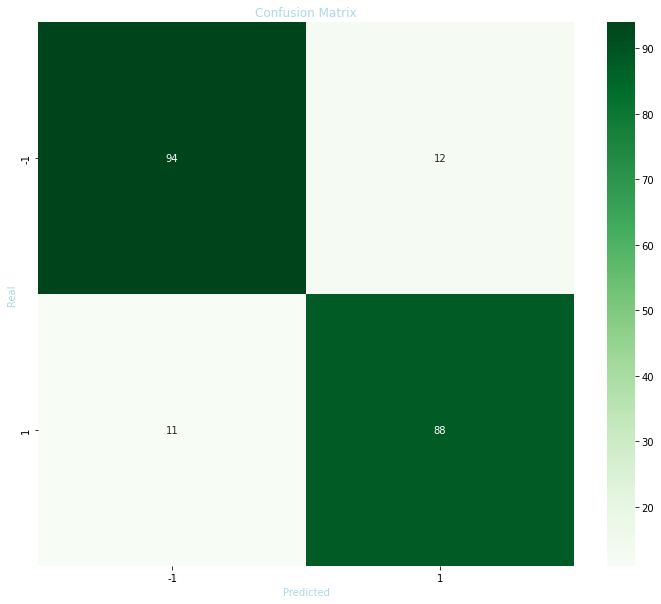

In [40]:
cm = confusion_matrix(y_val, predictions)
plot_confusion_matrix(cm, labels)

### F1 Score

Using your implemented functions in the previous section, calculate precision, recall and F1 score using confusion matrix. Then calculate all three metrics for your model.

In [41]:
print(recall_score(cm))

0.8888888888888888


In [42]:
print(precision_score(cm))

0.88


In [43]:
print(f1_score(cm))

0.8844221105527638


### Heatmap

By ploting the heatmap obtained for chol and oldpeak features from your model, compare the usefulness of these two features.


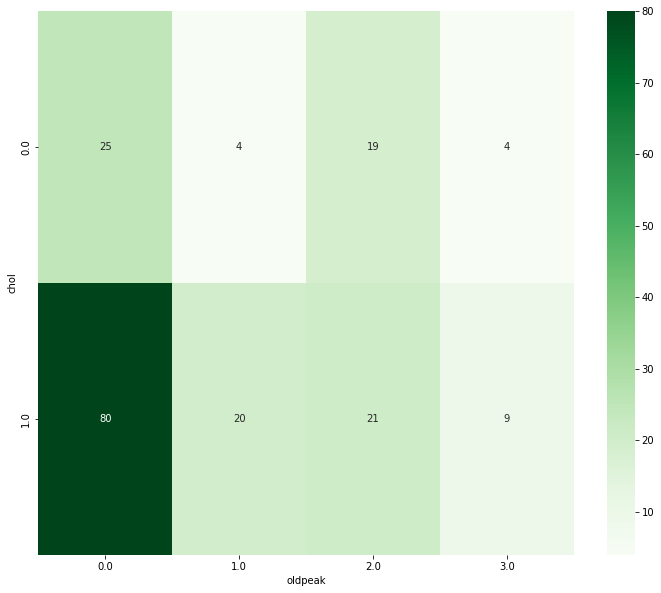

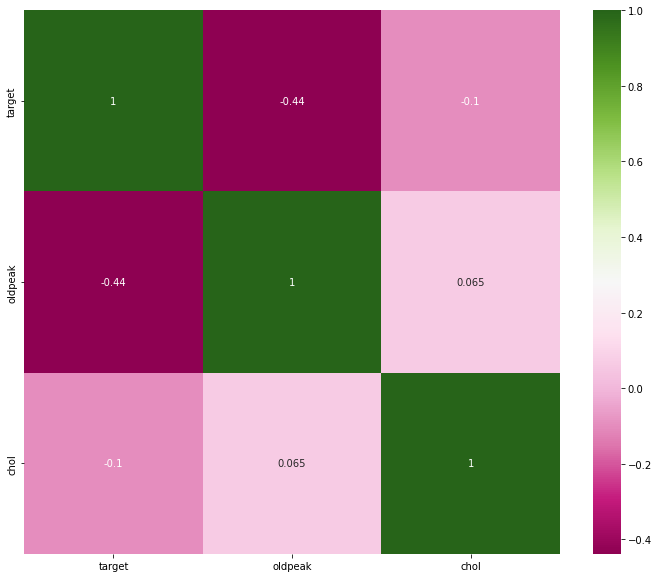

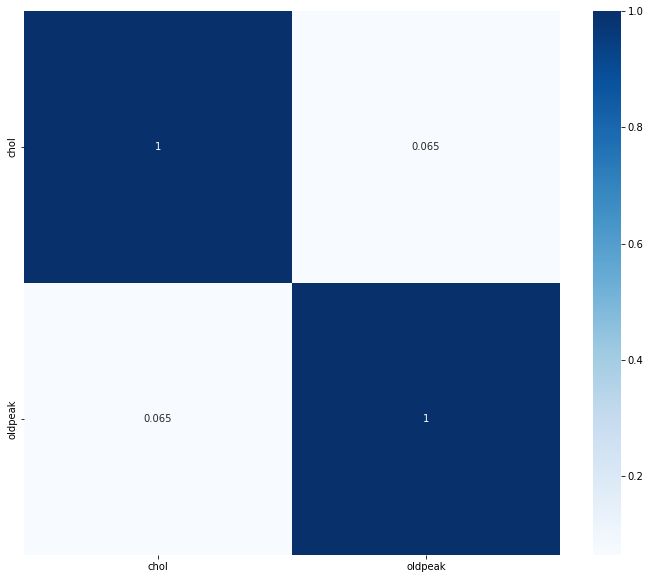

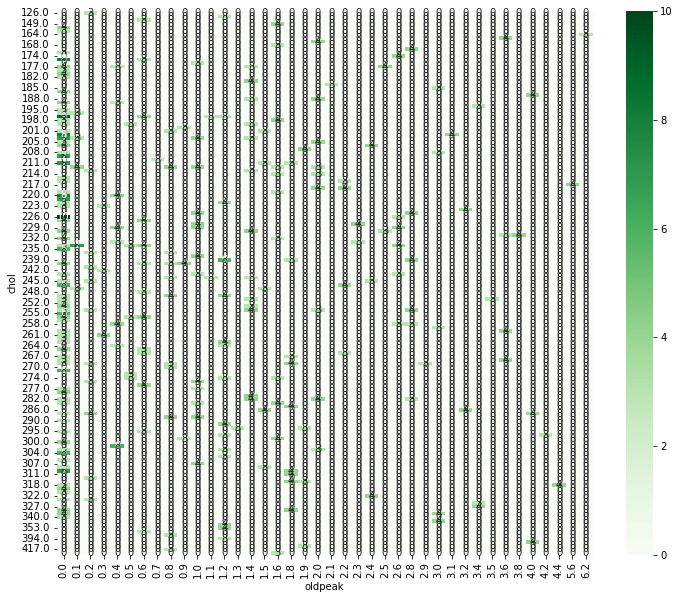

In [44]:
# First:
# Help from GPT
df1 = pd.DataFrame({'Real': y_val, 'Predicted': predictions, 'chol': X_val[:, 0], 'oldpeak': X_val[:, 1]})
df2 = df1[df1['Real'] == df1['Predicted']]
heatmap = df2.groupby(['chol', 'oldpeak']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap, annot=True, cmap='Greens')
plt.show()
# Second:
datas = df[['target' , 'oldpeak' , 'chol']]
correlation_matrix = datas.corr()
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="PiYG")
plt.show()
# Third:
columns = ['chol', 'oldpeak']
correlation_matrix = df[columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()
# Fourth:
predictions = model.predict(X)
df3 = pd.DataFrame({'Predicted': predictions, 'chol': X[:, 10], 'oldpeak': X[:, 12]})
df_correct = df3[df3['Predicted'] == y]
heatmap = df_correct.groupby(['chol', 'oldpeak']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap, annot=True, cmap='Greens')
plt.show()

Train your model once by removing the chol feature and once by removing the oldpeak feature and calculate its accuracy. Compare the obtained results with the previous part.

Remove Chol and test model

In [45]:
# print(X)
idx = feature_list.index('chol')
new_X = np.delete(X, idx, 1)
# print(new_X)
train_count = int(new_X.shape[0] * 0.8)
X_train, X_val, y_train, y_val = new_X[:train_count], new_X[train_count:], y[:train_count], y[train_count:]

model2 = MixedDataNB()
model2.fit(X_train, y_train)
predictions = model2.predict(X_val)

print("Accuracy: ", round(accuracy_score(y_val, predictions) * 100, 3),"\n")
cm = confusion_matrix(y_val, predictions)
print("\nrecall: ", round(recall_score(cm), 4))
print("precision: ", round(precision_score(cm), 4))
print("f1_scores: ", round(f1_score(cm), 4))

Accuracy:  87.805 

TP:  85
FN:  14
FP:  11
TN:  95

recall:  0.8586
precision:  0.8854
f1_scores:  0.8718


Remove oldpeak and test model

In [46]:
# print(X)
idx = feature_list.index('oldpeak')
new_X = np.delete(X, idx, 1)
# print(new_X)
train_count = int(new_X.shape[0] * 0.8)
X_train, X_val, y_train, y_val = new_X[:train_count], new_X[train_count:], y[:train_count], y[train_count:]

model2 = MixedDataNB()
model2.fit(X_train, y_train)
predictions = model2.predict(X_val)

print("Accuracy: ", round(accuracy_score(y_val, predictions) * 100, 3),"\n")
cm = confusion_matrix(y_val, predictions)
print("\nrecall: ", round(recall_score(cm), 4))
print("precision: ", round(precision_score(cm), 4))
print("f1_scores: ", round(f1_score(cm), 4))

Accuracy:  86.829 

TP:  85
FN:  14
FP:  13
TN:  93

recall:  0.8586
precision:  0.8673
f1_scores:  0.8629


Comparison

**Answer:**
<font dir="rtl" color="Salmon">
    <br>
     همانطور که مشخص است از لحاظ دقت، با حذف هردو مقداری کم شده است اما این مقدار تغییر برای oldpeak
    بیشتر بوده است.
    <br>
    اما به طور کلی هر دو تاثیر کمی داشته اند.
</font>

# Comparison

Which model did better: the perceptron or the Naive Bayes model? What factors do you think influenced the difference in their performance?

### Answer:
<font dir="rtl" color="Salmon">
    <br>
    دقت برای perceptron حدود 74 درصد و برای Naive Bayes حدود 88 درصد بوده است. بنابراین Naive Bayes عملکرد بهتری داشته است.<br>
    لازم بود که فضای فرضیه پیچیده تری داشته باشیم و برای همین با پیچده تر کردن فضای فرضیه و استفاده از مدل
    Naive Bayes
   دیدیم ک دقت زیاد شد.
    <br>
    همچنین به کمک کوررلیشن دیدیم ک داده ها تقریبا و relativly مستقل هستند که این با منطق و عملکرد Naive Bayes بیشتر همخوانی دارد ولی بایاس بیشتری برای Perceptron ایجاد میکند
    که باعث شد دقت کمتری داشته باشد.
    <br>
    دلیل دیگر این بود که 2 دسته داده داشتیم و طبیعتا Naive Bayes بهتر عمل می‌نماید.
</font>

# Imbalanced Data

By using the model you designed and the functions you implemented, train your model on the three imbalanced data sets provided to you and calculate accuracy, recall, precision, and F1 score metrics for it each time. The confusion matrix should also be plotted each time. Finally, analyze based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets. **Note:** In order to prevent code duplication, you are free to define functions and only use them with different datasets.

## First dataset

### Load data

In [47]:
df = pd.read_csv("Imbalanced_Datasets/1.csv")

### Find the distribution


Find the number of samples from each target label.

In [48]:
df['target'].value_counts()

0    499
1    226
Name: target, dtype: int64

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Split data

In [50]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
y = np.array([1 if i == 1 else -1 for i in y])
train_count = int(X.shape[0] * 0.8)
X_train, X_val, y_train, y_val = X[:train_count], X[train_count:], y[:train_count], y[train_count:]

### Train model and make predictions

In [51]:
model.fit(X_train, y_train)
predictions = model.predict(X_val)

### Plot confusion matrix

TP:  37
FN:  6
FP:  5
TN:  97


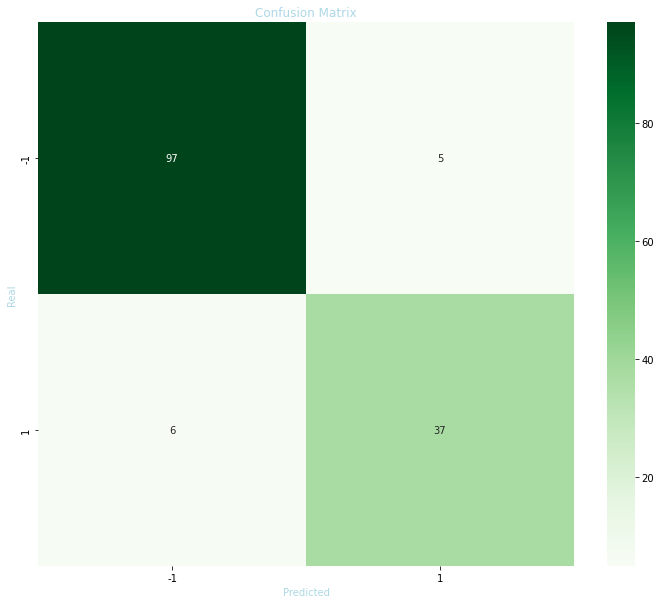

In [52]:
cm = confusion_matrix(y_val, predictions)
plot_confusion_matrix(cm, labels)

### Calculate metrics

In [53]:
print("Accuracy: ", round(accuracy_score(y_val, predictions) * 100, 3),"\n")
print("recall: ", round(recall_score(cm), 4))
print("precision: ", round(precision_score(cm), 4))
print("f1_scores: ", round(f1_score(cm), 4))

Accuracy:  92.414 

recall:  0.8605
precision:  0.881
f1_scores:  0.8706


## Second dataset

### Load data

In [54]:
df = pd.read_csv("Imbalanced_Datasets/2.csv")

### Find the distribution


Find the number of samples from each target label.

In [55]:
df['target'].value_counts()

0    499
1    126
Name: target, dtype: int64

### Split data

In [56]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach']].to_numpy()
y = df.loc[:, "target"].to_numpy()
y = np.array([1 if i == 1 else -1 for i in y])
train_count = int(X.shape[0] * 0.8)
X_train, X_val, y_train, y_val = X[:train_count], X[train_count:], y[:train_count], y[train_count:]

### Train model and make predictions

In [57]:
model.fit(X_train, y_train)
predictions = model.predict(X_val)

### Plot confusion matrix

TP:  20
FN:  8
FP:  4
TN:  93


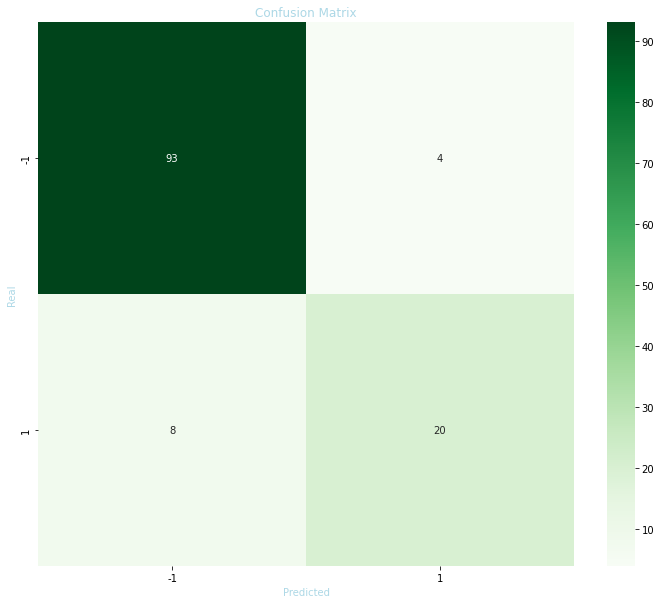

In [58]:
cm = confusion_matrix(y_val, predictions)
plot_confusion_matrix(cm, labels)

### Calculate metrics

In [59]:
print("Accuracy: ", round(accuracy_score(y_val, predictions) * 100, 3),"\n")
print("recall: ", round(recall_score(cm), 4))
print("precision: ", round(precision_score(cm), 4))
print("f1_scores: ", round(f1_score(cm), 4))

Accuracy:  90.4 

recall:  0.7143
precision:  0.8333
f1_scores:  0.7692


## Third dataset

### Load data

In [60]:
df = pd.read_csv("Imbalanced_Datasets/3.csv")

### Find the distribution


Find the number of samples from each target label.

In [61]:
df['target'].value_counts()

0    499
1     26
Name: target, dtype: int64

### Split data

In [62]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach']].to_numpy()
y = df.loc[:, "target"].to_numpy()
y = np.array([1 if i == 1 else -1 for i in y])
train_count = int(X.shape[0] * 0.8)
X_train, X_val, y_train, y_val = X[:train_count], X[train_count:], y[:train_count], y[train_count:]

### Train model and make predictions

In [63]:
model.fit(X_train, y_train)
predictions = model.predict(X_val)

### Plot confusion matrix

TP:  0
FN:  3
FP:  0
TN:  102


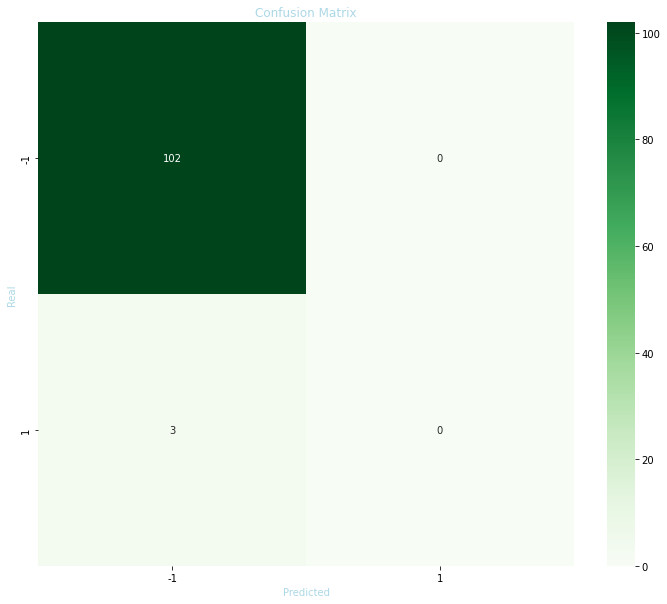

In [64]:
cm = confusion_matrix(y_val, predictions)
plot_confusion_matrix(cm, labels)

### Calculate metrics

In [65]:
print("Accuracy: ", round(accuracy_score(y_val, predictions) * 100, 3),"\n")
print("recall: ", round(recall_score(cm), 4))
print("precision: ", round(precision_score(cm), 4))
print("f1_scores: ", round(f1_score(cm), 4))

Accuracy:  97.143 

recall:  0.0
precision:  nan
f1_scores:  nan


C:\Users\AMIRRE~1\AppData\Local\Temp/ipykernel_4272/1178440399.py:2: RuntimeWarning: invalid value encountered in long_scalars
  return cm[1][1] / (cm[1][1] + cm[0][1])
C:\Users\AMIRRE~1\AppData\Local\Temp/ipykernel_4272/1232598744.py:3: RuntimeWarning: invalid value encountered in long_scalars
  precision = cm[1][1] / (cm[1][1] + cm[0][1])


## Comparison

Based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets?

**Answer:**
<font dir="rtl" color="Salmon">
    <br>
     به دلیل اینکه منظور سوال را به طور درست متوجه نشده‌ام، یکبار جواب‌های 3تا دیتاست را مقایسه می‌کنم و بار دیگر تفاوت میان f1_scores و accuracy
</font>

<font dir="rtl" color="SeaGreen">
    <br>
    در دیتاست آخر، به دلیل کم بودن اطلاعات و مقدار زیاد imbalanced بودن آن، طبیعتا به نتیجه قابل توجه و درستی نرسیده‌‍ایم
    .<br>
    دیتاست اول و دوم بهتر عمل کرده‌اند اما با توجه به مقادیر f1_scores می‌توان گفت دیتاست اول به دلیل داشتن سمپل بیشتر، عملکرد بهتری داشته است.
    <br>
    
</font>

<font dir="rtl" color="LightBlue">
    <br>
     در اینجا به تفاوت میان f1_scores و accuracy می‌پردازیم.
    :<br>
    به طور کلی، مقدار f1_scores مخصوصا برای توزیع کلاس نامتعادل مفیدتر و قابل اعتناتر می‌باشد.<br>
    accuracy 
 ممکن است مناسب ترین متریک برای ارزیابی عملکرد مدل نباشد. زیرا که یک طبقه بندی کننده می تواند با پیش بینی کلاس اکثریت برای همه نمونه ها، به دقت بالایی برسد ، که لزوما نشان دهنده توانایی آن در طبقه بندی صحیح نمونه های کلاس اقلیت نیست.
    به مثال زیر توجه فرمایید:
    <br>
</font>
<font dir="ltr" color="LightBlue">
    Imagine we have a classification model for detecting a specific disease, where only 10% of the population actually has the disease and the rest are healthy.

If we have a very simple model that classifies everyone as healthy, our accuracy will be very high (around 90%) because most of the data is healthy. However, this model is not useful at all since it fails to detect any cases of the disease, so its F1 score will be very low.

On the other hand, if we have a more sophisticated model that is powerful enough to detect many cases of the disease, but may misclassify some healthy individuals as diseased, it might have slightly lower accuracy (say 75%), but its F1 score will be much higher because it detects more cases of the disease and also correctly identifies a large number of healthy individuals.

Therefore, the F1 score helps us evaluate a model's performance better in situations where classes are imbalanced and helps us consider how well precision and recall are balanced. In cases where precision and recall have equal importance, accuracy as a general metric may be sufficient.
</font>  